In [74]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
import seaborn as sns
sns.set()

In [2]:
wine = pd.read_csv("C:\dta\wine.csv")
wine.describe()
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
# Considering only numerical data 
wine.data = wine.iloc[:,1:]
wine.data.head()
# Converting into numpy array
WIN = wine.data.values
WIN

<ipython-input-4-9c1ca67703be>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  wine.data = wine.iloc[:,1:]


array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [7]:
# Normalizing the numerical data 
wine_normal = scale(WIN)

In [8]:
wine_normal

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [57]:
pca = PCA(n_components = 5)
pca_values = pca.fit_transform(wine_normal)

In [58]:
pca_values


array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01,
        -2.15631188e-01,  6.93042841e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00,
        -2.91358318e-01, -2.57654635e-01],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01,
         7.24902309e-01, -2.51033118e-01],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01,
         5.67983308e-01, -3.11841591e-01],
       [ 1.00890849e+00, -8.69830821e-01,  2.02668822e+00,
        -4.09765788e-01,  2.98457503e-01],
       [ 3.05025392e+00, -2.12240111e+00, -6.29395827e-01,
        -5.15637495e-01, -6.32018734e-01],
       [ 2.44908967e+00, -1.17485013e+00, -9.77094891e-01,
        -6.58305046e-02, -1.02776191e+00],
       [ 2.05943687e+00, -1.60896307e+00,  1.46281883e-01,
        -1.19260801e+00,  7.69034938e-02],
       [ 2.51087430e+00, -9.18070957e-01, -1.77096903e+00,
         5.62703612e-02, -8.92256977e-01],
       [ 2.75362819e+00, -7.89437674e-01, -9.84247490e-01,
         3.49381568e-01

In [59]:
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294])

In [60]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([36.2 , 55.41, 66.53, 73.6 , 80.16])

In [23]:
from sklearn.cluster import KMeans

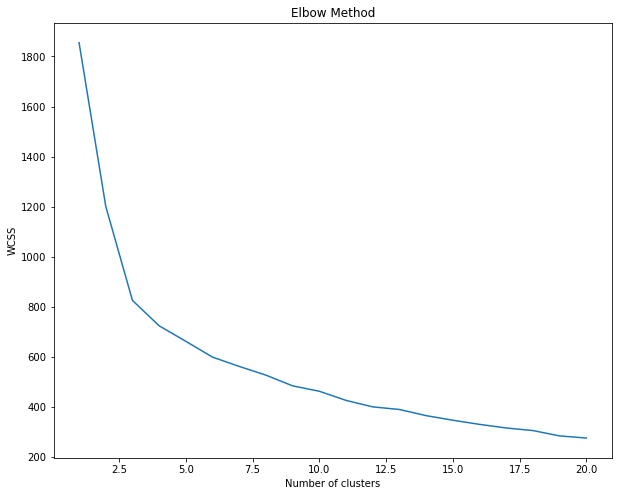

In [38]:
wcss = []
for i in range(1, 21):
    kmeans_pca = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans_pca.fit(pca_values)
    wcss.append(kmeans_pca.inertia_)
    
plt.figure(figsize=(10,8))    
plt.plot(range(1, 21), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [39]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(pca_values )

KMeans(n_clusters=4, random_state=42)

In [40]:
clusters_new.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 1, 0, 0, 2, 2,
       0, 0, 2, 0, 2, 2, 2, 3, 0, 0, 0, 2, 0, 2, 0, 0, 2, 1, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 3, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 2, 2, 2, 2, 0, 2, 1, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [41]:
wine['clusterid_new'] = clusters_new.labels_

In [42]:
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterid_new
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,3
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,3
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,3
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


In [61]:
wine1=pd.concat([wine.reset_index(drop=True),pd.DataFrame(pca_values)],axis =1)
wine1.columns.values[-5:]=['pc1','pc2','pc3','pc4','pc5']

In [62]:
wine1

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterid_new,pc1,pc2,pc3,pc4,pc5
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,3,3.316751,-1.443463,-0.165739,-0.215631,0.693043
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,3,2.209465,0.333393,-2.026457,-0.291358,-0.257655
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3,2.516740,-1.031151,0.982819,0.724902,-0.251033
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,3,3.757066,-2.756372,-0.176192,0.567983,-0.311842
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,3,1.008908,-0.869831,2.026688,-0.409766,0.298458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1,-3.370524,-2.216289,-0.342570,1.058527,-0.574164
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1,-2.601956,-1.757229,0.207581,0.349496,0.255063
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1,-2.677839,-2.760899,-0.940942,0.312035,1.271355
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1,-2.387017,-2.297347,-0.550696,-0.688285,0.813955


In [75]:
wine1['segments']=wine1['clusterid_new'].map({0:'first',1:'second',2:'Third',3:'fourth'})

In [76]:
import matplotlib.pyplot as plt


C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


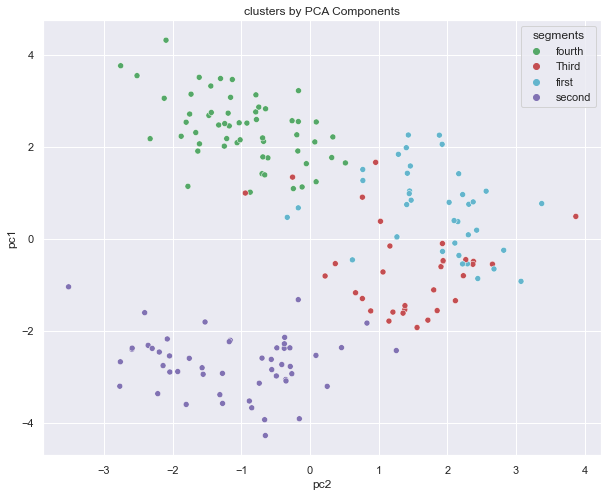

In [78]:
x_axis=wine1['pc2']
y_axis=wine1['pc1']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=wine1['segments'],palette=['g','r','c','m'])
plt.title('clusters by PCA Components')
plt.show()